# Lecture 5: Linear systems

## Previous lecture
- Matrix rank
- Skeleton decomposition
- Low-rank approximation
- Singular Value Decomposition (SVD)

## Today lecture
Today we talk about: 
- Linear systems
- Inverse matrix
- Condition number
- Gaussian elimination

## Linear systems

Linear systems of equations are the basic tool in NLA.

They appear as:

- Linear regresion problems
- Discretization of partial differential/integral equations
- Linearizations of nonlinear regression problems
- Optimization (i.e., Gauss-Newton and Newton-Raphson methods, KKT).


## Linear equations and matrices
From school we know about linear equations. 

A linear system of equations can be written in the form
\begin{equation}
\begin{split}
    &2 x + 3 y = 5\quad &\longrightarrow \quad &2x + 3 y + 0 z = 5\\
    &2 x + 3z = 5\quad &\longrightarrow\quad &2 x + 0 y + 3 z = 5\\
    &x + y = 2\quad &\longrightarrow\quad  & 1 x + 1 y + 0 z = 2\\
\end{split}
\end{equation}

## Matrix form
The "matrix form" is
$$
\begin{pmatrix}
2 & 3 & 0 \\
2 & 0 & 3 \\
1 & 1 & 0 \\
\end{pmatrix}\begin{pmatrix}
x \\
y \\
z 
\end{pmatrix} = 
\begin{pmatrix}
5 \\
5 \\
2
\end{pmatrix}
$$
or simply
$$
A u = f, 
$$

where $A$ is a $3 \times 3$ matrix.

## Over/under determined linear systems

If the system $Au = f$ has more equations than unknowns it is called **overdetermined** system (generically, no solution)

If the system $Au = f$ has less equations than unknowns it is called **underdetermined** system (solution is non-unique, to make it unique additional assumptions have to be made).

## Existence of solutions 

A solution to the linear system of equations with a **square** matrix $A$

$$A u = f$$

exists, iff 
* $\det A \ne 0$

or

* Matrix $A$ has full rank.

## Scales of linear systems

In different applications, the typical size of the linear systems can be different. 

- Small: $n \leq 10^4$ (full matrix can be stored in memory, **dense matrix**)
- Medium: $n = 10^4 - 10^6$ (typically, **sparse** or **structured**)
- Large: $n = 10^8 - 10^9$ (typicall **sparse** + parallel computations)

## Linear systems can be big
We take a continious problem, discretize on a mesh with $N$ elements and get a linear system with $N\times N$ system.  
Example of a mesh around A319 aircraft
(taken from [GMSH website](http://geuz.org/gmsh/)).  
<img src="a319_4.png" width=50%>
The main difficulty is that these systems are big: millions or billions of unknowns!

## Linear systems can be structured
Storing $N^2$ elements of a matrix is prohibitive even for $N = 100000$.  

How to work with such matrices?  

Fortunately, those matrices are **structured** and require $\mathcal{O}(N)$ parameters to be stored.  

The most widespread structure are **sparse matrices**: in the matrix there are $\mathcal{O}(N)$ non-zeros!  

Example (one of the famous matrices around for $n = 5$):
$$
  \begin{pmatrix}
  2 & -1 & 0 & 0 & 0 \\
  -1 & 2 & -1 & 0 & 0 \\
  0 & -1 & 2 & -1 & 0 \\
  0 & 0 &-1& 2 & -1  \\
  0 & 0 & 0 & -1 & 2 \\
  \end{pmatrix}
$$
At least you can store such matrices, and multiply by vector fast; but how to solve linear systems?! (and that is typically the final goal).

## Main questions about linear systems

1. What is the accuracy we get from the solution (due to rounding errors)?
2. How we compute the solution? (LU-decomposition, Gaussian elimination)
3. What is the complexity of the solution of linear systems?

## How to solve linear systems?
**Important**: forget about determinants and the **Cramer rule** (it is  good for $2 \times 2$ matrices still)!

## How to solve linear systems?

The main tool is variable elimination. 
\begin{equation}
\begin{split}
    &2 y + 3 x = 5 \quad&\longrightarrow \quad &y = 5/2 -  3/2 x \\
    &2 x + 3z = 5 \quad&\longrightarrow\quad &z = 5/3 - 2/3 x\\
    &x + y = 2 \quad&\longrightarrow\quad  & 5/2 + 5/3 - (3/2 + 2/3) x = 2,\\
\end{split}
\end{equation}
and that is how you find $x$ (and all previous ones).  

This process is called **Gaussian elimination** and is one of the most widely used algorithms. 

## Gaussian elimination
Gaussian elimination consists of two steps:
1. Forward step
2. Backward step

## Forward step
In the forward step, we eliminate $x_1$:

$$
   x_1 = f_1 - (a_{12} x_2 + \ldots + a_{1n} x_n)/a_{11},
$$

and then substitute this into the equations $2, \ldots, n$. 

Then we eliminate $x_2$ and so on from the second equation. 

The important thing is that the **pivots** (that we divide over) are not equal to $0$.

## Backward step
In the backward step, we solve equation for $x_n$, put it into the equation for $x_{n-1}$ and so on, until we 
compute all $x_i, i=1,\ldots, n$.

## Gaussian elimination and LU decomposition
Gaussian elimination is the computation of one of the most important matrix decompositions: **LU-decomposition**.

**Definition**: LU-decomposition of the squared matrix $A$ is the representation

$$A =  LU,$$

where $L$ is **lower triangular** and $U$ is **upper triangular** matrix (i.e. elements strictly above the diagonal are zero, elements strictly below the diagonal are zero)

This factorization is **non-unique**, so it is typical to require that the matrix $L$ has ones on the diagonal.

**Main goal** of the LU decomposition is to solve linear systems, because

$$
    A^{-1} f = (L U)^{-1} f = U^{-1} L^{-1} f, 
$$

and this reduces to the solution of two linear systems **forward step**
$$
     L y = f, 
$$
and **backward step**
$$
   U x = y.
$$

Does $LU$ decomposition always exist?

## Complexity of the Gaussian elimination/LU decomposition
Each elimination step requires $\mathcal{O}(n^2)$ operations. 

Thus, the cost of the naive algorithm is $\mathcal{O}(n^3)$.  

**Think a little bit**: Can Strassen help here? 

## Block LU-decomposition

We can try to compute **block** version of LU-decomposition:


$$\begin{bmatrix} A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix} = \begin{bmatrix} L_{11} & 0 \\
L_{21} & L_{22}
\end{bmatrix} \begin{bmatrix} U_{11} & U_{12} \\
0 & U_{22} 
\end{bmatrix}
$$
There are two basic operations: compute LU-factorization of half-matrices + matrix-by-matrix product.

## Computing LU-decomposition
In many cases, computing LU-decomposition once is a good idea!

Once the decomposition is found (it is $\mathcal{O}(n^3)$), then solving linear systems with $L$ and $U$ costs only $\mathcal{O}(n^2)$ operations.

**Check:** Solving linear systems with triangular matrices is easy (why?). How we compute the $L$ and $U$ factors? 

Not let us see how it works in numpy (for the Hilbert matrix, of course).


## Existence of the LU-decomposition
The LU-decomposition algorithm does not fail  

if **we do not divide by zero** at every step of the Gaussian elimination.

When it is so, for which class of matrices?

It is true for **strictly regular matrices**.

## Strictly regular matrices and LU decomposition 
A matrix $A$ is called strictly regular, if all of its **principal minors**  

(i.e, submatrices in the first $k$ rows and $k$ columns) are non-singular. 

In this case, there always exists a LU-decomposition.  The reverse is also true (check!).

**Proof**. If there is a LU-decomposition, then the matrix is strictly regular 

This follows from the fact that to get a minor you multiply a corresponding submatrix of $L$ by a corresponding submatrix of $U$, 

and they are non-singular (since non-singularity of triangular matrices is equivalent to the fact that their diagonal elements are not equal to zero).

The other way can be proven by **induction**. Suppose that we know that for all $(n-1) \times (n-1)$ matrices will non-singular minors LU-decomposition exists.

Then, consider the block form
$$
    A = \begin{bmatrix}
          a & c^{\top} \\
          b & D
    \end{bmatrix},
$$
where $D$ is $(n-1) \times (n-1)$.

Then we do "block elimination": 

$$
     \begin{bmatrix}
     1 & 0 \\
     -z & I
     \end{bmatrix}
     \begin{bmatrix}
     a & c^{\top} \\
     b & D 
     \end{bmatrix}=
     \begin{bmatrix}
     a & c^{\top} \\
     0 & A_1
     \end{bmatrix},
$$

where $z = \frac{b}{a}, \quad A_1 = D - \frac{1}{a} b c^{\top}$.  
We can show that $A_1$ is also strictly regular, thus it has (by induction) the LU-decomposition:  
$$
   A_1 = L_1 U_1, 
$$
And that gives the $LU$ decomposition of the original matrix.


**Corollary:** If $L$ is unit triangular (ones on the diagonal), then $LU$-decomposition is unique. <br>
*Proof:* Indeed, $L_1 U_1 = L_2 U_2$ means $L_2^{-1} L_1 = U_2 U_1^{-1}$. $L_2^{-1} L_1 $ is lower triangular with ones on the diagonal. $U_2 U_1^{-1}$ is upper triangular. Thus, $L_2^{-1} L_1 = U_2 U_1^{-1} = I$ and $L_1 = L_2$, $U_1 = U_2$.

## LU for positive definite Hermitian matrices (Cholesky factorization)

Strictly regular matrices have LU-decomposition. 

An important **subclass** of strictly regular matrices is the class of **Hermitian positive definite matrices**


**Definition:** A matrix is called <font color='red'> positive definite </font> if for any $x: \Vert x \Vert \ne 0$ we have

$$(Ax, x) > 0.$$

**Claim:** A Hermitian positive definite matrix $A$ is strictly regular and has **Cholesky factorization** of the form 

$$A = RR^*,$$

where $R$ is a lower triangular matrix.

Let us try to prove this fact (on the whiteboard).

It is sometimes referred to as "square root" of the matrix.

## When LU fails
What happens, if the matrix is not strictly regular (or the **pivots** in the Gaussian elimination are really small?). 

There is classical $2 \times 2$ example of a matrix with a bad LU decomposition.  

The matrix we look at is  
$$
    A = \begin{pmatrix}
    \varepsilon & 1 \\
    1 & 1 
    \end{pmatrix}
$$

If $\varepsilon$ is sufficiently small, we **might** fail. In contrast the Cholesky factorization is **always stable**.

Let us do some demo here.

In [11]:
import numpy as np
eps = 1e-18#1.12e-16
a = [[eps, 1],[1.0,  1]]
a = np.array(a)
a0 = a.copy()
n = a.shape[0]
L = np.zeros((n, n))
U = np.zeros((n, n))
for k in range(n): #Eliminate one row   
    L[k, k] = 1
    for i in range(k+1, n):
        L[i, k] = a[i, k] / a[k, k]
        for j in range(k+1, n):
            a[i, j] = a[i, j] - L[i, k] * a[k, j]
    for j in range(k, n):
        U[k, j] = a[k, j]

print 'L * U - A:', np.dot(L, U) - a0
L

L * U - A: [[  0.00000000e+00   0.00000000e+00]
 [ -1.11022302e-16  -1.00000000e+00]]


array([[  1.00000000e+00,   0.00000000e+00],
       [  1.00000000e+18,   1.00000000e+00]])

## The concept of pivoting
We can do pivoting, i.e. permute rows and columns to maximize $A_{kk}$ that we divide over.  

The simplest but effective strategy is the **row pivoting**: at each step, select the index that is maximal in modulus, and put it onto the diagonal. 

It gives us the decomposition 

$$A = P L U,$$
where $P$ is a **permutation matrix**.


What makes **row pivoting** good?  

It is made good by the fact that  

$$
   | L_{ij}|<1,
$$
but the elements of $U$ can grow, up to $2^n$! (in practice, this is very rarely encountered).

Can you come up with a matrix where the elements of $U$ grow as much as possible?

# Stability of linear systems

There is a fundamental problem of solving linear systems which is independent on the algorithm used.

It occures when elements of a matrix are represented as floating point numbers or there is some measurement noise.

Let us illustrate this issue on the following example.

2.84925499042


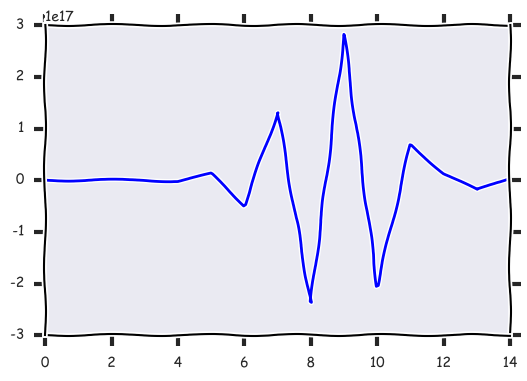

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
n = 15
a = [[1.0/(i + j + 1) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
x = np.linalg.solve(a, rhs) #This function computes LU-factorization and solves linear system

#And check if everything is fine
er = np.linalg.norm(a.dot(x) - rhs) / np.linalg.norm(rhs)
print er
plt.xkcd()
plt.plot(x)

As you see, the error grows with larger $n$, and we have to find out why.  
**Important point** is that it is not a problem of the algorithm: it is a problem of representing  
the matrix in the memory. The error occurs in the moment when the matrix elements are evaluated approximately.

## Linear systems and inverse matrix
What was the problem in the previous example? 

Why the error grows so quickly?  

And here is one of the main concepts of numerical linear algebra: the concept of **condition number** of a matrix.  

But before that we have to define the **inverse**. 

## Inverse: definition
The inverse of a matrix $A$ is defined as a matrix $X$ denoted by $A^{-1}$ such that  
$$
   AX = XA = I, 
$$
where $I$ is the identity matrix (i.e., $I_{ij} = 0$ if $i \ne j$ and $1$ otherwise).
The computation of the inverse is linked to the solution of linear systems.  Indeed, $i$-th column of the product gives  
$$
A x_i = e_i,
$$
where $e_i$ is the $i$-th column of the identity matrix. Thus, we can apply Gaussian elimination to solve this system. Moreover, if there are no divisions by zero in this process (and the pivots do not depend on the right-hand side), then it is possible to solve the system.


## Inverse matrix and linear systems
If we have computed $A^{-1}$, the solution of linear system  

$$Ax = f$$

is just $x = A^{-1} f$.  

Indeed,  

$$   
    A(A^{-1} f) = (AA^{-1})f = I f = f.
$$

## Neumann series 
To study, why there can be such big errors in a solution (see the example above on the Hilbert matrix)  we need an important auxilary result:  

**Neumann series**:  

If for a matrix $\Vert F \Vert < 1$ then the matrix $(I - F)$ is invertible and

$$(I - F)^{-1} = I + F + F^2 + F^3 + \ldots = \sum_{k=0}^{\infty} F^k.$$

Note that it is a matrix version of the geometric progression. 

**Question**: What norm is considered here? What is the "best possible" norm here?

## Proof
The proof is constructive. First of all, the show prove that the series $\sum_{k=0}^{\infty} F^k$ converges.  

Like in the scalar case, we have  
$$
   (I - F) \sum_{k=0}^N F^k = (I - F^{N+1}) \rightarrow I.
$$

Indeed, 
$$
\| (I - F^{N+1}) - I\| = \|F^{N+1}\| \leqslant \|F\|^{N+1} \to 0, \quad N\to +\infty.
$$

We can also estimate the **norm of the inverse**:
$$
  \Vert \sum_{k=0}^N F^k \Vert \leq \sum_{k=0}^N \Vert F \Vert^k \Vert I \Vert \leq \frac{\Vert I \Vert}{1 - \Vert F \Vert} 
$$

## Small perturbation of the inverse
Using this result, we can estimate, how the perturbation of the matrix influences the inverse matrix. We assume
that the perturbation $E$ is small in the sense that $\Vert A^{-1} E \Vert < 1$. Then
$$(A + E)^{-1} = \sum_{k=0}^{\infty} (-A^{-1} E)^k A^{-1}$$
and moreover, 
$$
  \frac{\Vert (A + E)^{-1} - A^{-1} \Vert}{\Vert A^{-1} \Vert} \leq \frac{\Vert A^{-1} \Vert \Vert E \Vert \Vert I \Vert}{1 - \Vert A^{-1} E \Vert}.
$$
As you see, the norm of the inverse enters the estimate.

## Condition number of a linear system
Now consider the **perturbed** linear system:
$$
   (A + \Delta A) \widehat{x} = f + \Delta f.
$$

## Estimates

$$
\begin{split}
\widehat{x} - x &= (A + \Delta A)^{-1} (f + \Delta f) - A^{-1} f =\\ 
&= \left((A + \Delta A)^{-1} - A^{-1}\right)f + (A + \Delta A)^{-1} \Delta f = \\
&= \Big[\sum_{k=0}^{\infty} (-A^{-1} \Delta A)^k\Big] A^{-1} f + \Big[\sum_{k=0}^{\infty} (A^{-1} \Delta A)^k \Big] A^{-1} \Delta f,
\end{split}
$$  
therefore
$$
\begin{split}
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq 
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A^{-1}\Delta A\|} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \leq \\
\leq
&\frac{\Vert A \Vert \Vert A^{-1} \Vert}{1 - \|A\|\|A^{-1}\|\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big) \equiv \\
\equiv &\frac{\mathrm{cond}(A)}{1 - \mathrm{cond}(A)\frac{\|\Delta A\|}{\|A\|}} \Big(\frac{\Vert\Delta A\Vert}{\Vert A \Vert} + \frac{\Vert \Delta f \Vert}{ \Vert f \Vert}\Big)
\end{split}
$$

The crucial role is played by the **condition number** $\mathrm{cond}(A) = \Vert A \Vert \Vert A^{-1} \Vert$.

## Condition number 
The larger the condition number, the less number of digits we can recover. Note, that the condition number is different for different norms.

Note, that if $\Delta A = 0$, then
$$
\frac{\Vert \widehat{x} - x \Vert}{\Vert x \Vert} \leq \mathrm{cond}(A) \frac{\|\Delta f\|}{\|f\|}
$$

The spectral norm of the matrix is equal to **largest singular value**, and the singular values of the inverse matrix are equal to the inverses of the singular values.  Thus,  the condition number is equal to the ratio of the largest singular value and the smallest singular value.
$$
    \mathrm{cond}_2 (A) = \|A\|_2 \|A^{-1}\|_2 = \frac{\sigma_{\max}}{\sigma_{\min}}
$$

## Hilbert matrix (again)
We can also try to test how tight is the estimate, both with ones in the right-hand side, and with a random vector in the right-hand side. The results are strickingly different

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n = 1000
a = [[1.0/(i + j + 1) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
rhs = np.ones(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a, 2)
print 'Error:', er, 'Condition number:', cn

Error: 8.96141017158e-08 Condition number: 1.5912638327e+20


And with random right-hand side...

Error: 3.91614106742 Condition number: 6.38251409635e+19


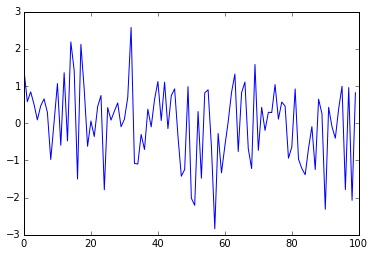

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
a = [[1.0/(i + j + 1) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
rhs = np.random.randn(n) #Right-hand side
f = np.linalg.solve(a, rhs)

#And check if everything is fine
er = np.linalg.norm(a.dot(f) - rhs) / np.linalg.norm(rhs)
cn = np.linalg.cond(a)
print 'Error:', er, 'Condition number:', cn


u, s, v = np.linalg.svd(a)
rhs = np.random.randn(n)
plt.plot(u.T.dot(rhs))

** Can you think about an explanation?**  

## Overdetermined linear systems
Important class of problems are **overdetermined linear systems**, when the number of equations is greater, than the number of unknowns. The simplest example that you all know, is **linear fitting**, fitting a set of 2D points by a line.

Then, a typical way is to minimize the residual (**least squares**)

$$\Vert A x - b \Vert_2 \rightarrow \min$$

## Overdetermined system and Gram matrix

The optimality condition is $0\equiv \delta \left(\|Ax-b\|_2^2\right)$, where $\delta$ denotes variation. Therefore,

$$
\begin{split}
0\equiv \delta \left(\|Ax-b\|_2^2\right) =\delta \left(Ax-b, Ax - b\right) = (A\delta x, Ax-b)+ (Ax-b, A\delta x) =
2(A x - b, A \delta x) = 2(A^*(A x - b), \delta x) = 0, 
\end{split}
$$
for any $\delta x$. Here we used, that $\delta(Ax-b)=A\delta x$ ($A$ is linear operator and $b$ is constant) and $(x,Ay) \equiv (A^*x, y)$. Thus,
$$
\quad A^* A x = A^* b
$$
The matrix $A^* A$ is called **Gram matrix** and the system is called **normal equations**. 

This is not a good way to do it, since the condition number of $A^* A$ is a square of condition number of $A$ (check why).

## Pseudoinverse

Matrix $A^* A$ can be singular in general case. 
Therefore, we need to introduce the concept of pseudoinverse matrix  $A^{\dagger}$ such that <br>
solution to the linear least squares problem can formally be written as
$$x = A^{\dagger} b.$$

The matrix $$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*$$ is called **Moore-Penrose** pseudoinverse of the matrix $A$.

* If matrix $A$ has full column rank, then $A^* A$ is non-singular and we get $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^*$.

* If matrix $A$ is squared and non-singular we get $A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = (A^* A)^{-1} A^* = A^{-1} A^{-*} A^* = A^{-1}$ - standard inverse of $A$

* If $A$ has linearly dependent columns, then $A^\dagger b$ gives solution that has minimal Euclidean norm 

## Compute pseudoinverse via SVD
Let $A = U \Sigma V^*$ be the SVD of $A$. Then,

$$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

where $\Sigma^{\dagger}$ consists of inverses of non-zero singular values of $A$. Indeed,

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^* = \lim_{\alpha \rightarrow 0}( \alpha VV^* + V \Sigma^2 V^*)^{-1} V \Sigma U^* = \lim_{\alpha \rightarrow 0}( V(\alpha I + \Sigma^2) V^*)^{-1} V \Sigma U^* = V \lim_{\alpha \rightarrow 0}(\alpha I + \Sigma^2)^{-1} \Sigma U^* = V \Sigma^{\dagger} U^*,$$

* One can check that $\Sigma^{\dagger}$ contains just the inversion of nonzero singular values. <br>
* If singular values are small one can skip inverting them. This will result in a solution which is less sensitive to the noise in the right-hand-side.
* The condition number for the Euclidean norm is still just the ratio of largest and smallest non-zero singular values.

## A canonical way to solve linear least squares

Is to use the $QR$ decomposition.

Any matrix can be factored into a product 

$$A = Q R, $$
where $Q$ is unitary, and $R$ is upper triangular (details in the next lectures).

Then, since $$\|Ax - b\|_2 = \|QRx - b\|_2 =\|Rx - Q^*b\|_2$$ finding optimal $x$ is equivalent to solving $Rx = Q^* b$.



## Padding into a bigger system

Instead of solving $A^* A x = A^* b$, 

we introduce a new variable $r = Ax - b$ and then have

$$A^* r = 0, \quad r = Ax - b,$$

or in the block form

$$
\begin{bmatrix}
  0 & A^* \\
  A & -I 
\end{bmatrix}
\begin{bmatrix}
x \\
r
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
b
\end{bmatrix},
$$  

the total size of the system is $(n + m)$ square, and the condition number is the same as for $A$ (by the way, how we define the condition number of a rectangular matrix?)


## Example of LS
Consider a two-dimensional example. Suppose we have a linear model 
$$y = ax + b$$
and noisy data $(x_1, y_1), \dots (x_n, y_n)$. Then the linear system on coefficients will look as follows
$$
\begin{split}
a x_1 &+ b &= y_1 \\
&\vdots \\
a x_n &+ b &= y_n \\
\end{split}
$$
or in a matrix form
$$
\begin{pmatrix}
x_1 & 1 \\
\vdots & \vdots \\
x_n & 1 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b
\end{pmatrix} =
\begin{pmatrix}
y_1 \\
\vdots  \\
y_n \\
\end{pmatrix},
$$
which represents overdetermined system.

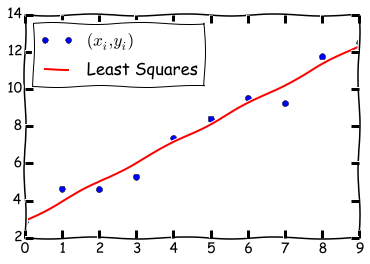

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a_exact = 1.
b_exact = 2.

n = 10
xi = np.arange(n)
yi = a_exact * xi + b_exact + 2*np.random.random(n)

A = np.array([xi, np.ones(n)])
coef = np.linalg.pinv(A).T.dot(yi) # coef is [a, b]

plt.xkcd()
plt.plot(xi, yi, 'o', label='$(x_i, y_i)$')
plt.plot(xi, coef[0]*xi + coef[1], label='Least Squares')
plt.legend(loc='best')

## Lacking for structure
A typical 3D-problem requires a $100 \times 100 \times 100$ discretization  

This gives a linear system with $10^6$ unknowns, right hand side takes $8$ megabytes of memory.

This matrix has $10^6 \times 10^6 = 10^{12}$ elements, takes $8$ terabytes of memory.

Fortunately, the matrices in real-life are not **dense**, but have certain **structure**:

- Sparse matrices
- Low-rank matrices
- Toeplitz matrices (shift-invariant property)
- Sparse in certain bases

## Summary
- Linear systems can be solved by Gaussian elimination, complexity in $\mathcal{O}(n^3)$.
- Linear systems can be solved by LU-decomposition, complexity is $\mathcal{O}(n^3)$ for the decomposition, $\mathcal{O}(n^2)$ for each solve
- Linear least squares can be solved by normal equation (bad)
- Linear least squares can be solved by QR-decomposition (good) or by augmentation (not bad)
- Without structure, we can solve up to $10^4$ linear systems on a laptop (memory restrictions)

## Next lecture
- Eigenvectors, eigenvalues, Schur theorem

##### Questions?

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()